In [2]:
#@title import Library
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [3]:
#@title SL_v0_2
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
#Implement the game as an Open AI  Gym environments so that you can apply a variety of reinforcement learning algorithms easily.
class SL_v0_2(Env):
    def __init__(self, test=False, spot_num=100):
        # Actions we can roll the dices
        self.action_space = Discrete(6)
        self.test = test
        self.spot_num = spot_num
        self.done = False
        self.state = 0

        self.A = [(i, i) for i in range(301)]
        self.A[1] =  (1, 38)
        self.A[4] =  (4, 14)
        self.A[9] =  (9, 31)
        self.A[21] = (21, 42)
        self.A[28] = (28, 84)
        self.A[51] = (51, 67)
        self.A[71] = (71, 91)
        self.A[80] = (80, 100)
        
        self.A[98] = (98, 79)
        self.A[95] = (95, 75)
        self.A[93] = (93, 73)
        self.A[87] = (87, 24)
        self.A[64] = (64, 60)
        self.A[62] = (62, 19)
        self.A[54] = (54, 34)
        self.A[17] = (17, 7)

        self.A[101] = (101, 138)
        self.A[104] = (104, 114)
        self.A[109] = (109, 131)
        self.A[121] = (121, 142)
        self.A[128] = (128, 184)
        self.A[151] = (151, 167)
        self.A[171] = (171, 191)
        self.A[180] = (180, 100)
        self.A[198] = (198, 179)
        self.A[195] = (195, 175)
        self.A[193] = (193, 173)
        self.A[187] = (187, 124)
        self.A[164] = (164, 160)
        self.A[162] = (162, 119)
        self.A[154] = (154, 134)
        self.A[117] = (117, 107)

        self.A[201] = (201, 238)
        self.A[204] = (204, 214)
        self.A[209] = (209, 231)
        self.A[221] = (221, 242)
        self.A[228] = (228, 284)
        self.A[251] = (251, 267)
        self.A[271] = (271, 291)
        self.A[280] = (280, 200)
        self.A[298] = (298, 279)
        self.A[295] = (295, 275)
        self.A[293] = (293, 273)
        self.A[287] = (287, 224)
        self.A[264] = (264, 260)
        self.A[262] = (262, 219)
        self.A[254] = (254, 234)
        self.A[217] = (217, 207)
  
    def back(self, x):
      # if self.spot_num == 100: 
      if x>self.spot_num: return self.spot_num-(self.spot_num-100)
      else: return x
      # elif self.spot_num == 200:
      #   if x>200: return 200-(x-200)
      #   else: return x
      # elif self.spot_num == 300:
      #   if x>300: return 300-(x-300)
      #   else: return x
       
        
    def step(self, action, state_test=-1, dice_test=0):
      if self.test:
        dice = dice_test
        self.state = state_test + dice_test
      else:
        dice = action + 1
        self.state = self.state + dice
      self.done = False
      reward = 0
      # if self.spot_num == 100:
      self.state = self.back(self.state)
      (cut_state, nxt_state) = self.A[self.state]
      if(cut_state != nxt_state):
        self.state = nxt_state
        if(cut_state > nxt_state): reward -= 20
        # print('{cut_state} {nxtstate}')
        elif(cut_state < nxt_state): reward += 5     
      if self.state == self.spot_num:
        reward += 1000
        self.done = True
          # if(self.board_cnt == self.board_num)
            
      else:
        reward -= 1  
          # print(self.prestate) 
          # self.done = False   
        # Return step information
      return self.state, reward, dice, self.done

   
    def reset(self):
      # reset position and previous position
      self.done = False
      self.state = 0
      return self.state

In [4]:
#@title SL_v1_2dice
import random
class SL_v1_2dice(SL_v0_2):
  def __init__(self, test=False, spot_num=100):
      # Actions we can roll the dices
      self.action_space = Discrete(2)
      self.test = test
      self.spot_num = spot_num
      self.done = False
      self.state = 0

      self.A = [(i, i) for i in range(301)]
      self.A[1] =  (1, 38)
      self.A[4] =  (4, 14)
      self.A[9] =  (9, 31)
      self.A[21] = (21, 42)
      self.A[28] = (28, 84)
      self.A[51] = (51, 67)
      self.A[71] = (71, 91)
      self.A[80] = (80, 100)
      
      self.A[98] = (98, 79)
      self.A[95] = (95, 75)
      self.A[93] = (93, 73)
      self.A[87] = (87, 24)
      self.A[64] = (64, 60)
      self.A[62] = (62, 19)
      self.A[54] = (54, 34)
      self.A[17] = (17, 7)

      self.A[101] = (101, 138)
      self.A[104] = (104, 114)
      self.A[109] = (109, 131)
      self.A[121] = (121, 142)
      self.A[128] = (128, 184)
      self.A[151] = (151, 167)
      self.A[171] = (171, 191)
      self.A[180] = (180, 100)
      self.A[198] = (198, 179)
      self.A[195] = (195, 175)
      self.A[193] = (193, 173)
      self.A[187] = (187, 124)
      self.A[164] = (164, 160)
      self.A[162] = (162, 119)
      self.A[154] = (154, 134)
      self.A[117] = (117, 107)

      self.A[201] = (201, 238)
      self.A[204] = (204, 214)
      self.A[209] = (209, 231)
      self.A[221] = (221, 242)
      self.A[228] = (228, 284)
      self.A[251] = (251, 267)
      self.A[271] = (271, 291)
      self.A[280] = (280, 200)
      self.A[298] = (298, 279)
      self.A[295] = (295, 275)
      self.A[293] = (293, 273)
      self.A[287] = (287, 224)
      self.A[264] = (264, 260)
      self.A[262] = (262, 219)
      self.A[254] = (254, 234)
      self.A[217] = (217, 207)
  def step(self, action, state_test=-1, dice_test=0):
    if action==0:
      dice = random.choice([1,1,3,3,5,5])
    elif action==1:
      dice = random.choice([2,2,4,4,6,6])
    # dice = action + 1
    # 
    self.state = self.state + dice
    self.done = False
    reward = 0
    # if self.spot_num == 100:
    self.state = self.back(self.state)
    (cut_state, nxt_state) = self.A[self.state]
    if(cut_state != nxt_state):
      self.state = nxt_state
      if(cut_state > nxt_state): reward -= 20
      # print('{cut_state} {nxtstate}')
      elif(cut_state < nxt_state): reward += 5     
    if self.state == self.spot_num:
      reward += 1000
      self.done = True
        # if(self.board_cnt == self.board_num)
          
    else:
      reward -= 1  
        # print(self.prestate) 
        # self.done = False   
      # Return step information
    return self.state, reward, dice, self.done
    def reset(self):
    # reset position and previous position
      self.done = False
      self.state = 0
    return self.state

In [5]:
#@title SL_v1_rdndice

import random
class SL_v1_rdndice(SL_v0_2):
  def __init__(self, test=False, spot_num=100, no_dice=2):
      # Actions we can roll the dices
      self.action_space = Discrete(no_dice)
      self.test = test
      self.spot_num = spot_num
      self.done = False
      self.state = 0
      self.no_dice = no_dice
      self.randomdice = []

      for i in range(self.no_dice):
        self.randomdice.append([random.randint(1,6) for i in range(6)])
      print(f'the {self.no_dice} dices are:')
      for i in range(self.no_dice):
        print(self.randomdice[i])
      self.A = [(i, i) for i in range(301)]
      self.A[1] =  (1, 38)
      self.A[4] =  (4, 14)
      self.A[9] =  (9, 31)
      self.A[21] = (21, 42)
      self.A[28] = (28, 84)
      self.A[51] = (51, 67)
      self.A[71] = (71, 91)
      self.A[80] = (80, 100)
      
      self.A[98] = (98, 79)
      self.A[95] = (95, 75)
      self.A[93] = (93, 73)
      self.A[87] = (87, 24)
      self.A[64] = (64, 60)
      self.A[62] = (62, 19)
      self.A[54] = (54, 34)
      self.A[17] = (17, 7)

      self.A[101] = (101, 138)
      self.A[104] = (104, 114)
      self.A[109] = (109, 131)
      self.A[121] = (121, 142)
      self.A[128] = (128, 184)
      self.A[151] = (151, 167)
      self.A[171] = (171, 191)
      self.A[180] = (180, 100)
      self.A[198] = (198, 179)
      self.A[195] = (195, 175)
      self.A[193] = (193, 173)
      self.A[187] = (187, 124)
      self.A[164] = (164, 160)
      self.A[162] = (162, 119)
      self.A[154] = (154, 134)
      self.A[117] = (117, 107)

      self.A[201] = (201, 238)
      self.A[204] = (204, 214)
      self.A[209] = (209, 231)
      self.A[221] = (221, 242)
      self.A[228] = (228, 284)
      self.A[251] = (251, 267)
      self.A[271] = (271, 291)
      self.A[280] = (280, 200)
      self.A[298] = (298, 279)
      self.A[295] = (295, 275)
      self.A[293] = (293, 273)
      self.A[287] = (287, 224)
      self.A[264] = (264, 260)
      self.A[262] = (262, 219)
      self.A[254] = (254, 234)
      self.A[217] = (217, 207)
  def step(self, action, state_test=-1, dice_test=0):
    
    dice = random.choice(self.randomdice[action])
    
    # dice = random.choice()
    # dice = action + 1
    # 
    self.state = self.state + dice
    self.done = False
    reward = 0
    # if self.spot_num == 100:
    self.state = self.back(self.state)
    (cut_state, nxt_state) = self.A[self.state]
    if(cut_state != nxt_state):
      self.state = nxt_state
      if(cut_state > nxt_state): reward -= 20
      # print('{cut_state} {nxtstate}')
      elif(cut_state < nxt_state): reward += 5     
    if self.state == self.spot_num:
      reward += 1000
      self.done = True
        # if(self.board_cnt == self.board_num)
          
    else:
      reward -= 1  
        # print(self.prestate) 
        # self.done = False   
      # Return step information
    return self.state, reward, dice, self.done
    def reset(self):
    # reset position and previous position
      self.done = False
      self.state = 0
    return self.state

Training score over time: 1006.365


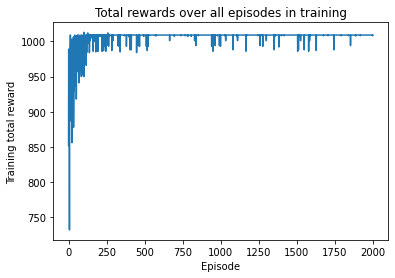

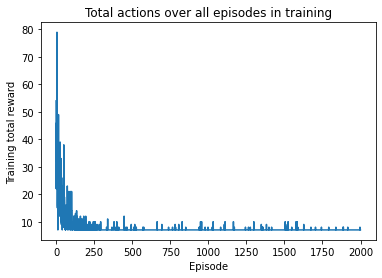

In [6]:
#@title QLearning V0
#STEP 1 - Initializing the Q-table
spot_num = 100
env = SL_v0_2(spot_num = spot_num)
state = env.reset()
score = 0
done =False
Q = np.zeros((spot_num + 1, env.action_space.n))
# Q.shape
#Setting the hyperparameters
              
alpha = 0.6 #learning rate                 
discount_factor = 0.8           
epsilon = 1                  
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.01         

train_episodes = 2000    
         
# max_steps = 100 



#Training the agent

#Creating lists to keep track of reward and epsilon values
training_rewards = []  
epsilons = []
action_list=[]
for episode in range(train_episodes):
    state = env.reset()
    done = False
    score = 0 
    action_cnt = 0    
#     #Starting the tracker for the rewards
    total_training_rewards = 0
    while not done:
#       #Choosing an action given the states based on a random number
        exp_exp_tradeoff = random.uniform(0, 1)       
#         ### STEP 2: SECOND option for choosing the initial action - exploit     
#         #If the random number is larger than epsilon: employing exploitation 
#         #and selecting best action 
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])      
        else:
            action = env.action_space.sample()

        new_state, reward, dice, done = env.step(action)
        Q[state, action] = Q[state, action] + alpha * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
        # print(f's:{state}, reward:{reward}, dice:{dice}, s_1:{new_state}') 
#         #Increasing our total reward and updating the state
        total_training_rewards += reward      
        state = new_state
        action_cnt += 1
    action_list.append(action_cnt)
    # print)        
        

    
#     #Cutting down on exploration by reducing the epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
    
#     #Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)
    
   
print ("Training score over time: " + str(sum(training_rewards)/train_episodes))
# print(Q)
#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
# print(x)
# print(training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

plt.figure()

#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, action_list)
# print(x)
# print(training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total actions over all episodes in training') 
plt.show()


In [7]:
#@title TD Algorithm

from IPython.core.display import TextDisplayObject
import numpy as np
from numpy.random import random as rdn
from numpy.random import choice
import random
def epsilon_greedy(state, Q, epsilon):

  values = Q[state,:]
  max_value = max(values)
  no_actions = len(values)

  greedy_actions = [a for a in range(no_actions) if values[a] == max_value]

  explore = (rdn() < epsilon)

  if explore:
    return choice([a for a in range(no_actions)])
  else:
    return choice([a for a in greedy_actions])

def TD(train_episodes = 10000, env=SL_v1_2dice(spot_num = 100), spot_num = 100, alpha = 0.1, discount_factor = 1.0, epsilon = 1.0, max_epsilon=1, min_epsilon=0.01, decay=0.01,   eligibility_decay = 0.9):
  gamma = discount_factor
  no_states = spot_num + 1
  no_actions = env.action_space.n
  Q = np.zeros((no_states, no_actions))
  action_list = []
  training_rewards = []
  for episode in range(train_episodes):
    epsilon *= decay
    state = env.reset()
    done = False
    score = 0
    action_cnt = 0
    total_training_rewards = 0
    action = epsilon_greedy(state, Q, epsilon)

    R = [] # No first return
    E = np.zeros((no_states, no_actions))

    while not done:

      E = eligibility_decay * gamma * E
      E[state, action] += 1

      new_state, reward, _, done = env.step(action)
      new_action = epsilon_greedy(new_state, Q, epsilon)

      delta = reward + gamma * Q[new_state, new_action] - Q[state, action]
      Q = Q + alpha * delta * E 

      state, action = new_state, new_action
      action_cnt += 1
      total_training_rewards += reward
    
    action_list.append(action_cnt)
    training_rewards.append(total_training_rewards)

  print("Training score over time: " + str(sum(training_rewards)/train_episodes))
  print("Training actions over time: " + str(sum(action_list)/train_episodes))
  # print(f'length :{len(action_list)}')
  # print(f'# actions: {sum(action_list)} # episodes:{train_episodes}')
  x = range(train_episodes)
  return x, training_rewards, action_list

Training score over time: 985.0605
Training actions over time: 16.338
Training score over time: 940.0878
Training actions over time: 47.5427
Training score over time: 911.5994
Training actions over time: 73.9051


<Figure size 432x288 with 0 Axes>

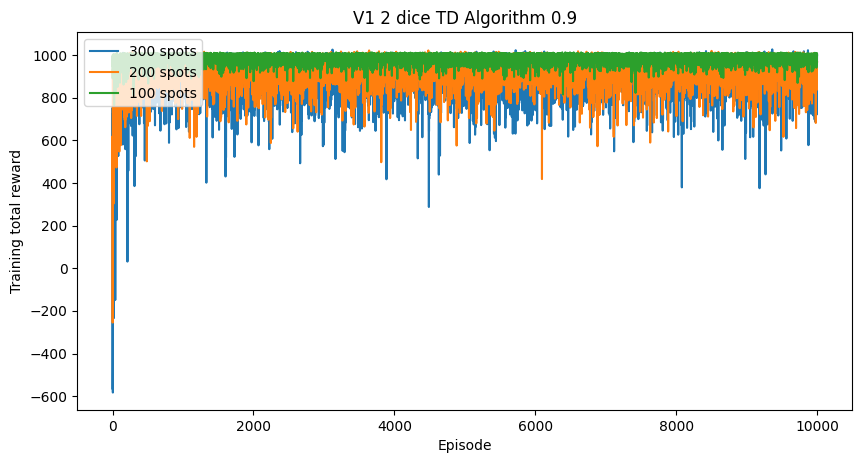

<Figure size 432x288 with 0 Axes>

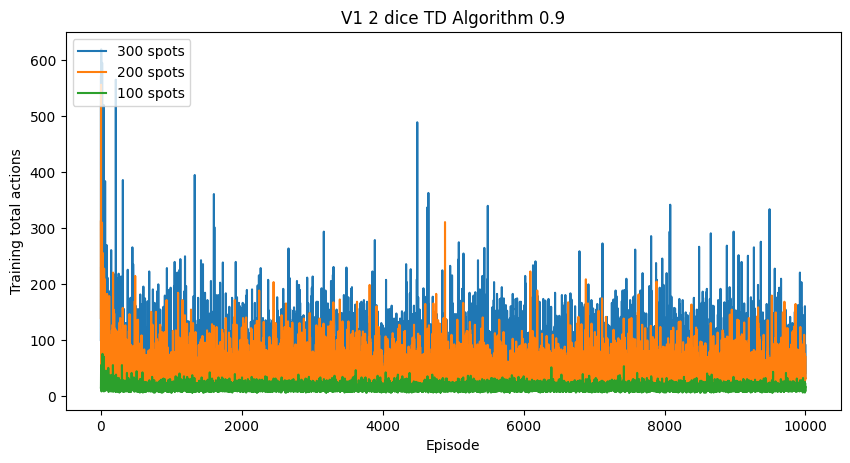

In [8]:
#@title V1 2 dice TD Algorithm 0.9
x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 100), 
   spot_num = 100, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.9)
_, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 200), 
   spot_num = 200, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.9)
_, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 300), 
   spot_num = 300, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.9)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('V1 2 dice TD Algorithm 0.9')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title('V1 2 dice TD Algorithm 0.9')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

Training score over time: 980.1065
Training actions over time: 17.3615
Training score over time: 943.4562
Training actions over time: 45.6948
Training score over time: 916.2117
Training actions over time: 72.7063


<Figure size 432x288 with 0 Axes>

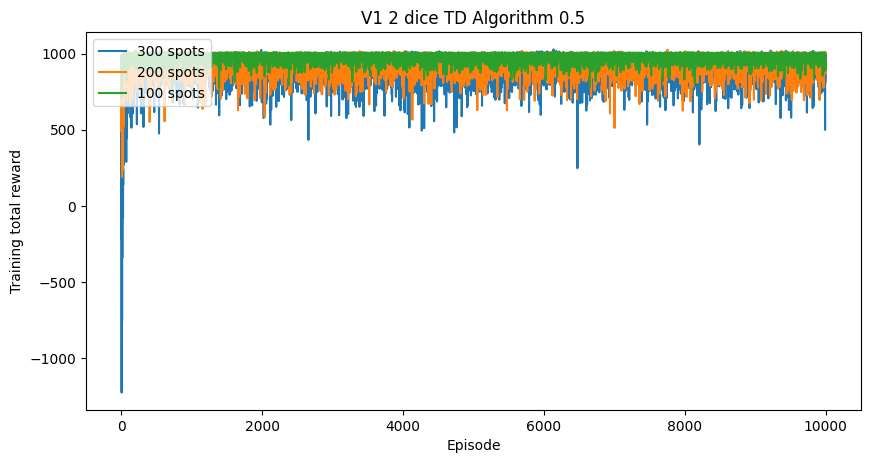

<Figure size 432x288 with 0 Axes>

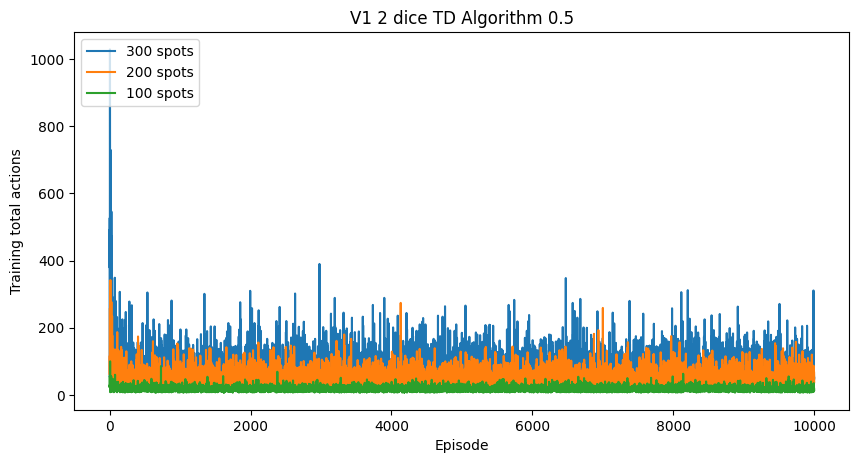

In [ ]:
#@title V1 2 dice TD Algorithm 0.5
x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 100), 
   spot_num = 100, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.5)
_, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 200), 
   spot_num = 200, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.5)
_, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 300), 
   spot_num = 300, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.5)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('V1 2 dice TD Algorithm 0.5')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title('V1 2 dice TD Algorithm 0.5')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

Training score over time: 984.7376
Training actions over time: 15.8789
Training score over time: 943.8392
Training actions over time: 45.9978
Training score over time: 915.1968
Training actions over time: 74.2267


<Figure size 432x288 with 0 Axes>

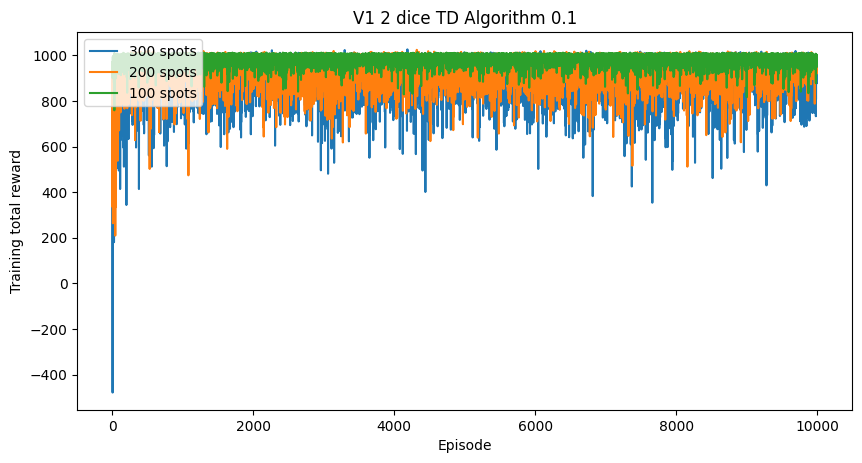

<Figure size 432x288 with 0 Axes>

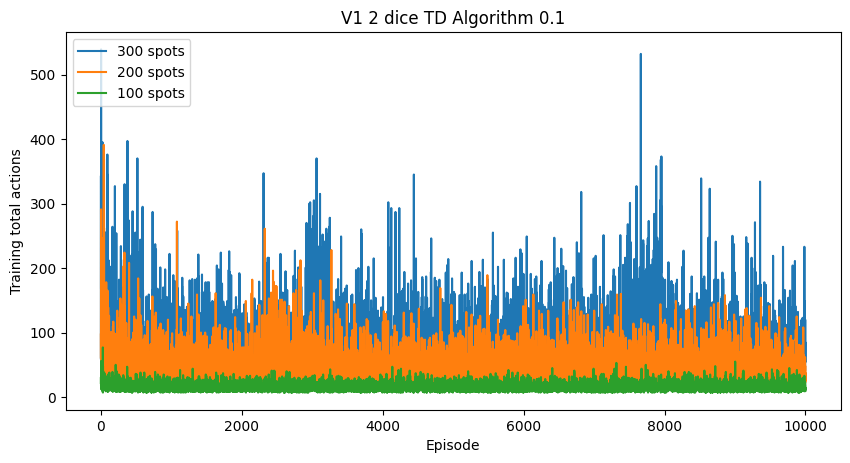

In [ ]:
#@title V1 2 dice TD Algorithm 0.1
x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 100), 
   spot_num = 100, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.1)
_, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 200), 
   spot_num = 200, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.1)
_, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_2dice(spot_num = 300), 
   spot_num = 300, alpha = 0.1, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.99,   
   eligibility_decay = 0.1)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('V1 2 dice TD Algorithm 0.1')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title('V1 2 dice TD Algorithm 0.1')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 2 dices are:
[3, 3, 2, 4, 3, 2]
[6, 1, 1, 5, 6, 1]
Training score over time: 981.2218
Training actions over time: 18.8597
the 2 dices are:
[5, 3, 2, 4, 2, 4]
[3, 2, 2, 6, 4, 6]
Training score over time: 805.4742
Training actions over time: 87.4578
the 2 dices are:
[4, 5, 3, 5, 3, 3]
[3, 4, 6, 4, 3, 2]
Training score over time: 676.8139
Training actions over time: 198.6021


<Figure size 432x288 with 0 Axes>

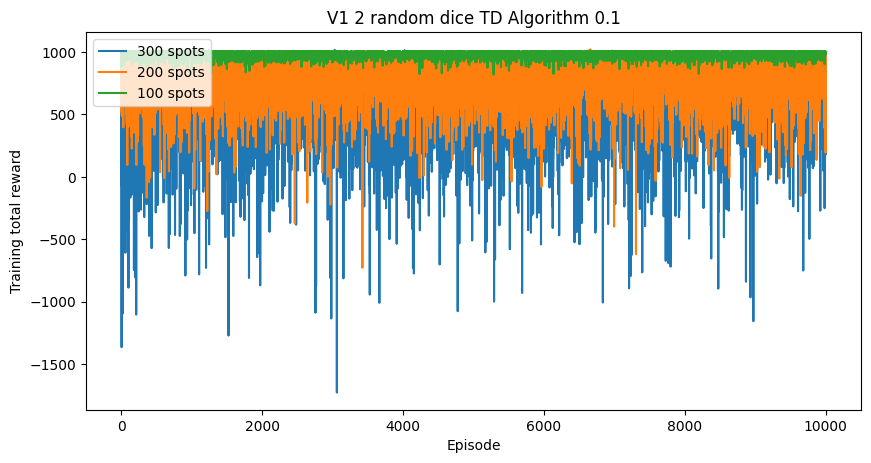

<Figure size 432x288 with 0 Axes>

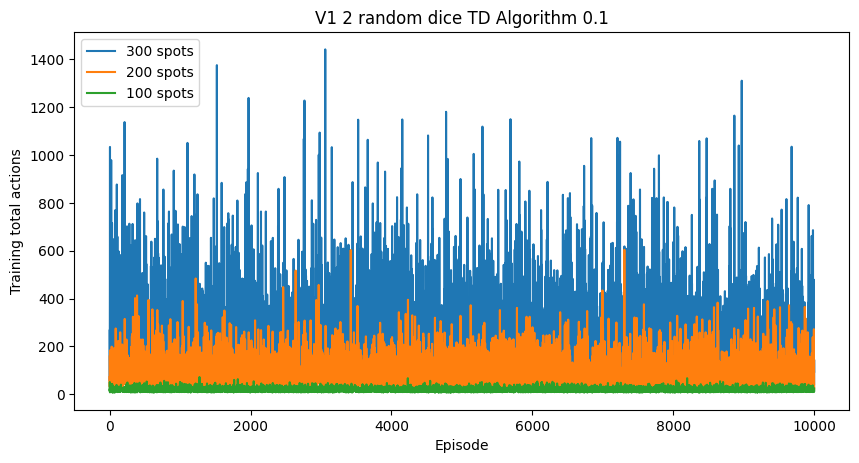

In [ ]:
#@title V1 2 random dice TD Algorithm 0.1
import matplotlib.pyplot as plt

x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=2), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.1)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=2), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.1)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=2), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.1)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('V1 2 random dice TD Algorithm 0.1')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title('V1 2 random dice TD Algorithm 0.1')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 2 dices are:
[3, 1, 1, 6, 5, 2]
[4, 6, 4, 5, 6, 1]
Training score over time: 961.4152
Training actions over time: 22.0053
the 2 dices are:
[5, 5, 6, 5, 5, 6]
[4, 3, 4, 3, 1, 6]
Training score over time: 919.4236
Training actions over time: 58.4404
the 2 dices are:
[3, 2, 1, 4, 4, 5]
[5, 3, 4, 2, 5, 5]
Training score over time: 616.1816
Training actions over time: 198.4449


<Figure size 432x288 with 0 Axes>

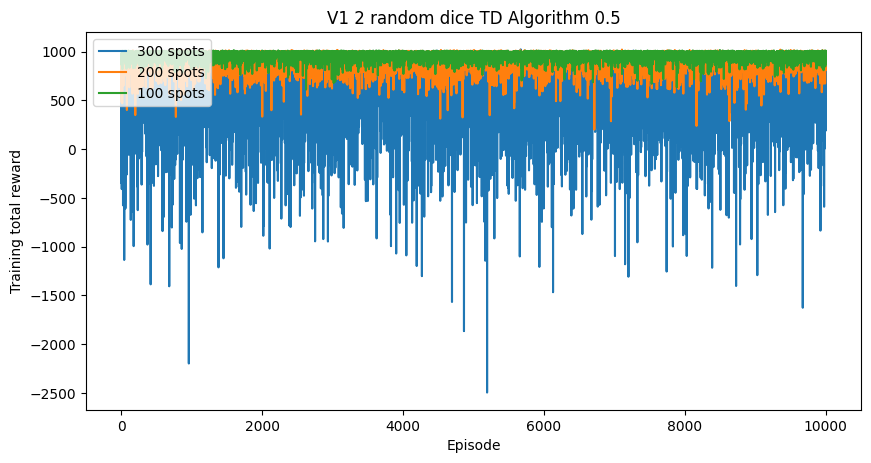

<Figure size 432x288 with 0 Axes>

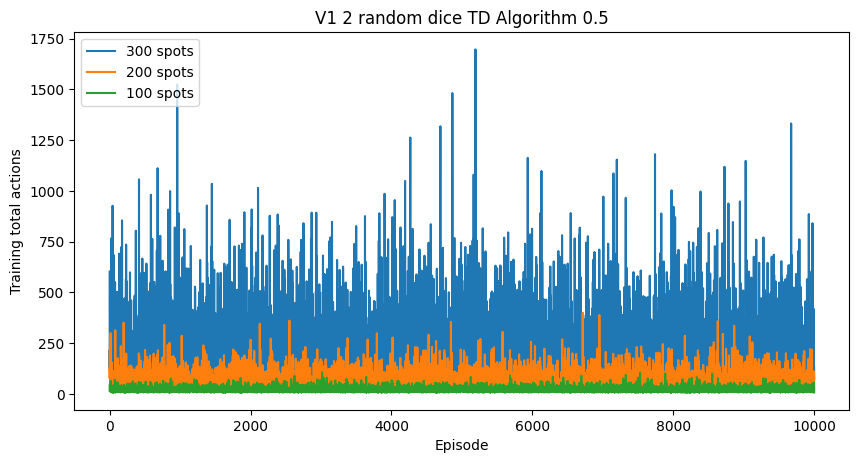

In [ ]:
#@title V1 2 random dice TD Algorithm 0.5
import matplotlib.pyplot as plt

x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=2), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.5)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=2), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.5)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=2), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.5)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('V1 2 random dice TD Algorithm 0.5')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title('V1 2 random dice TD Algorithm 0.5')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 2 dices are:
[2, 2, 5, 2, 1, 1]
[4, 1, 1, 6, 5, 1]
Training score over time: 953.3478
Training actions over time: 28.9292
the 2 dices are:
[3, 6, 1, 1, 3, 2]
[5, 4, 4, 5, 2, 5]
Training score over time: 818.5506
Training actions over time: 97.1349
the 2 dices are:
[5, 4, 1, 6, 6, 6]
[6, 1, 2, 6, 4, 6]
Training score over time: 428.0858
Training actions over time: 258.4662


<Figure size 432x288 with 0 Axes>

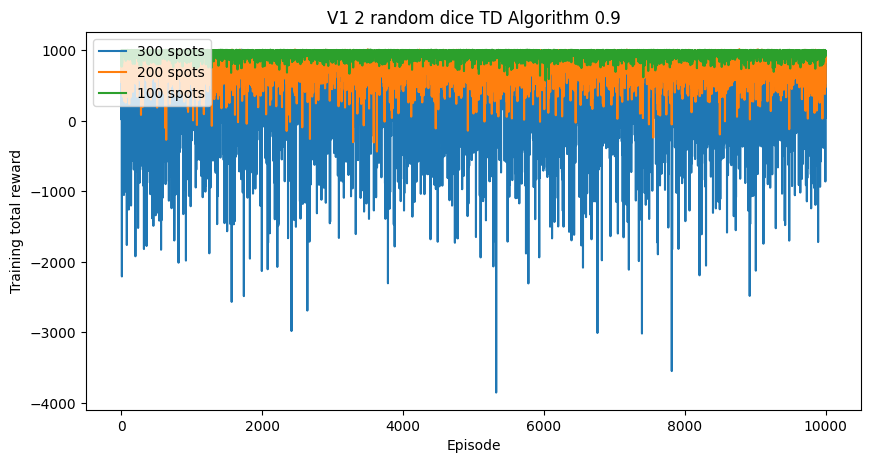

<Figure size 432x288 with 0 Axes>

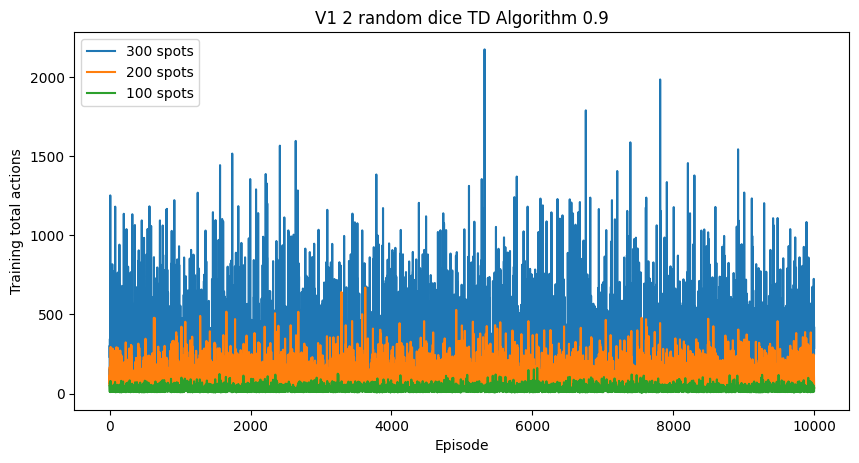

In [ ]:
#@title V1 2 random dice TD Algorithm 0.9
import matplotlib.pyplot as plt

x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=2), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.9)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=2), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.9)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=2), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.9)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('V1 2 random dice TD Algorithm 0.9')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title('V1 2 random dice TD Algorithm 0.9')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 4 dices are:
[2, 5, 5, 3, 5, 6]
[6, 6, 4, 5, 4, 4]
[1, 6, 1, 3, 2, 4]
[3, 2, 4, 6, 1, 3]
Training score over time: 983.9816
Training actions over time: 15.7169
the 4 dices are:
[5, 4, 6, 3, 1, 6]
[1, 2, 6, 3, 6, 2]
[2, 3, 2, 5, 4, 4]
[2, 4, 1, 4, 3, 3]
Training score over time: 900.024
Training actions over time: 60.3515
the 4 dices are:
[3, 3, 5, 2, 1, 4]
[2, 2, 6, 6, 6, 1]
[1, 5, 2, 4, 1, 6]
[1, 3, 2, 2, 4, 6]
Training score over time: 768.018
Training actions over time: 139.146


<Figure size 432x288 with 0 Axes>

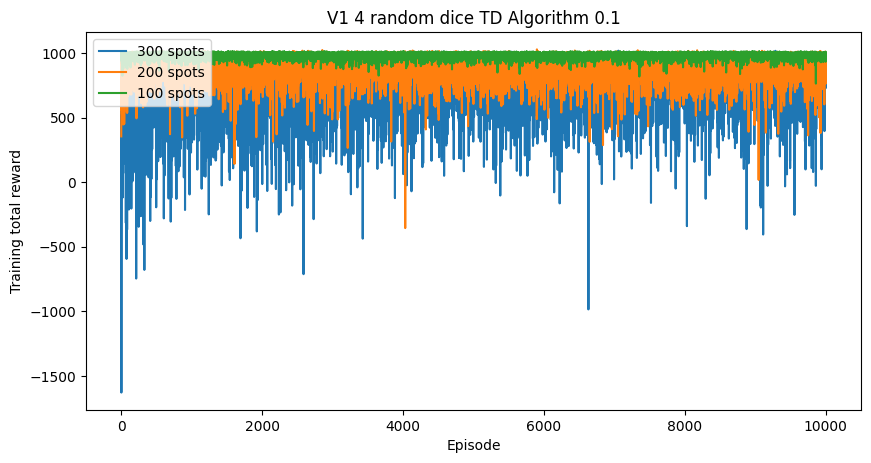

<Figure size 432x288 with 0 Axes>

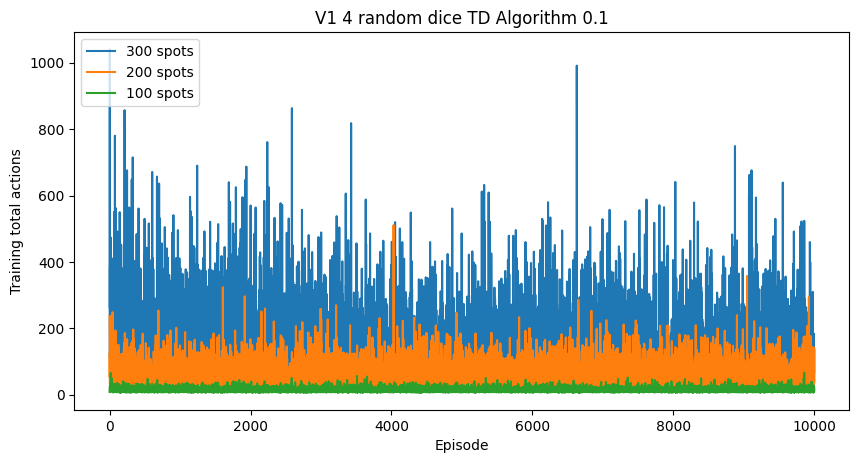

In [ ]:
#@title V1 4 random dice TD Algorithm 0.1
import matplotlib.pyplot as plt

x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=4), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.1)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=4), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.1)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=4), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = 0.1)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('V1 4 random dice TD Algorithm 0.1')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title('V1 4 random dice TD Algorithm 0.1')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 4 dices are:
[5, 6, 5, 5, 1, 5]
[3, 6, 6, 3, 5, 4]
[1, 3, 4, 6, 1, 6]
[1, 2, 3, 4, 3, 1]
Training score over time: 971.9163
Training actions over time: 20.2437
the 4 dices are:
[4, 3, 6, 2, 5, 6]
[3, 4, 3, 3, 2, 5]
[4, 6, 2, 5, 5, 4]
[6, 3, 6, 2, 5, 6]
Training score over time: 879.3213
Training actions over time: 64.4192
the 4 dices are:
[4, 5, 3, 6, 1, 1]
[2, 6, 4, 4, 5, 5]
[2, 5, 6, 2, 1, 6]
[1, 3, 1, 5, 6, 1]
Training score over time: 755.1231
Training actions over time: 166.7634


<Figure size 432x288 with 0 Axes>

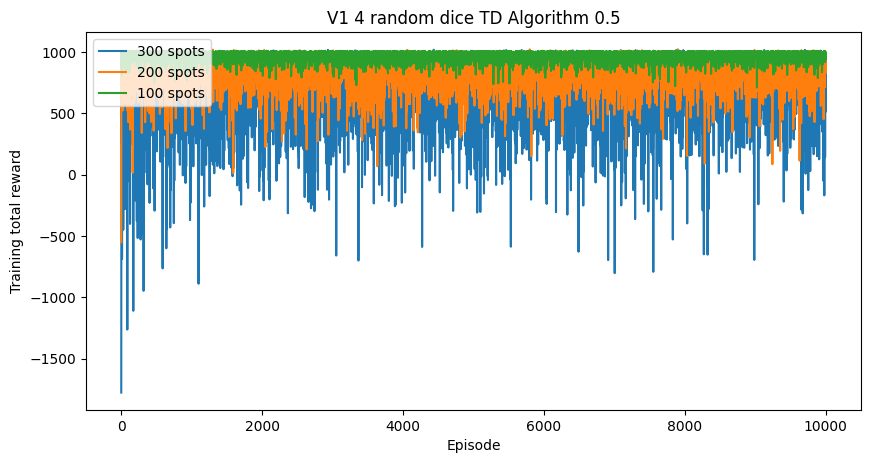

<Figure size 432x288 with 0 Axes>

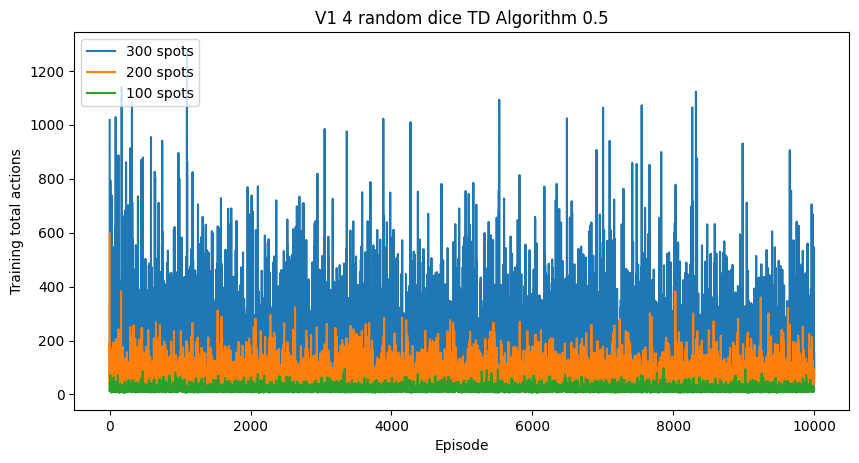

In [ ]:
#@title V1 4 random dice TD Algorithm 0.5
import matplotlib.pyplot as plt
no_dice=4
eligibility_decay=0.5
x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=no_dice), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=no_dice), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=4), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 4 dices are:
[3, 4, 3, 4, 2, 5]
[1, 1, 5, 5, 3, 6]
[2, 5, 6, 2, 6, 4]
[5, 6, 1, 6, 6, 5]
Training score over time: 969.9864
Training actions over time: 20.0066
the 4 dices are:
[5, 6, 6, 4, 6, 2]
[4, 4, 1, 2, 2, 6]
[4, 5, 2, 3, 5, 6]
[1, 1, 3, 4, 6, 1]
Training score over time: 790.6372
Training actions over time: 107.4843
the 4 dices are:
[1, 2, 2, 2, 4, 1]
[4, 5, 1, 5, 2, 2]
[4, 4, 5, 3, 6, 2]
[1, 6, 4, 6, 3, 1]
Training score over time: 758.0115
Training actions over time: 129.631


<Figure size 432x288 with 0 Axes>

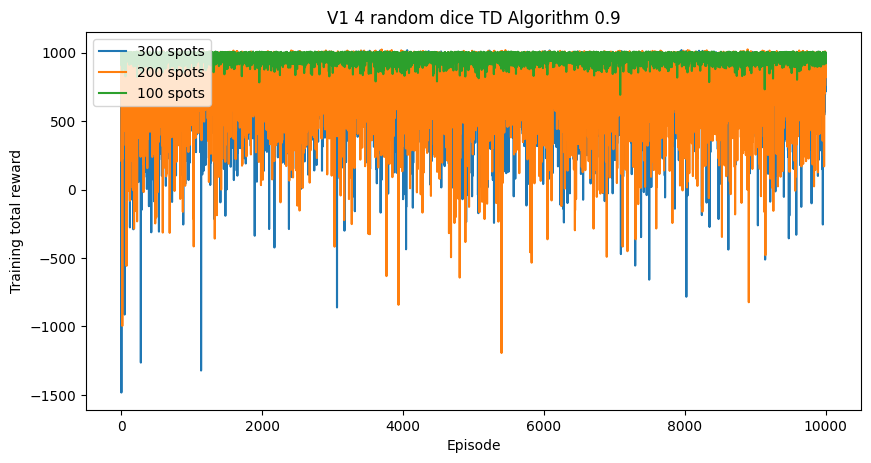

<Figure size 432x288 with 0 Axes>

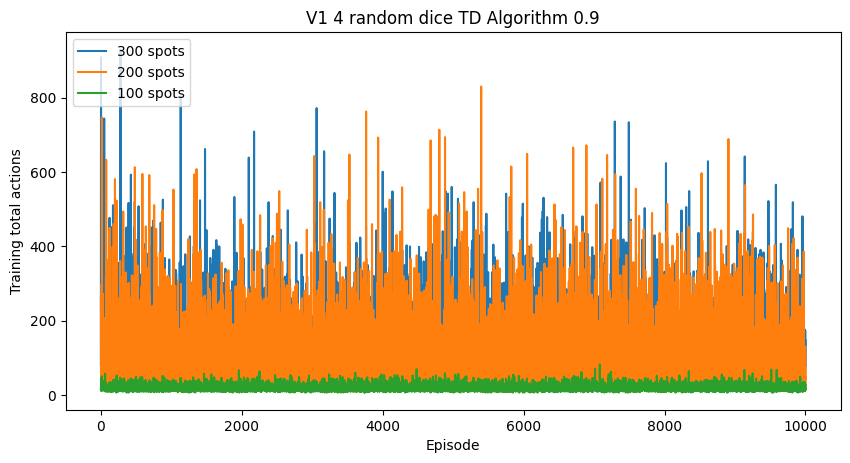

In [ ]:
#@title V1 4 random dice TD Algorithm 0.9
import matplotlib.pyplot as plt
no_dice=4
eligibility_decay=0.9
x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=no_dice), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=no_dice), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=no_dice), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 6 dices are:
[2, 3, 5, 2, 3, 2]
[5, 4, 6, 5, 6, 1]
[5, 1, 5, 6, 3, 1]
[1, 6, 2, 1, 1, 2]
[3, 4, 2, 3, 1, 6]
[4, 4, 2, 4, 1, 3]
Training score over time: 981.1896
Training actions over time: 17.3819
the 6 dices are:
[1, 3, 2, 1, 2, 6]
[6, 1, 6, 6, 3, 4]
[6, 4, 6, 6, 4, 3]
[6, 3, 1, 6, 1, 4]
[5, 3, 6, 3, 6, 3]
[2, 6, 1, 1, 2, 6]
Training score over time: 920.0358
Training actions over time: 52.2617
the 6 dices are:
[1, 3, 6, 5, 1, 5]
[3, 4, 3, 5, 2, 2]
[1, 6, 5, 5, 2, 5]
[2, 4, 6, 2, 5, 3]
[4, 2, 5, 1, 3, 1]
[3, 6, 6, 2, 3, 1]
Training score over time: 845.9697
Training actions over time: 126.7093


<Figure size 432x288 with 0 Axes>

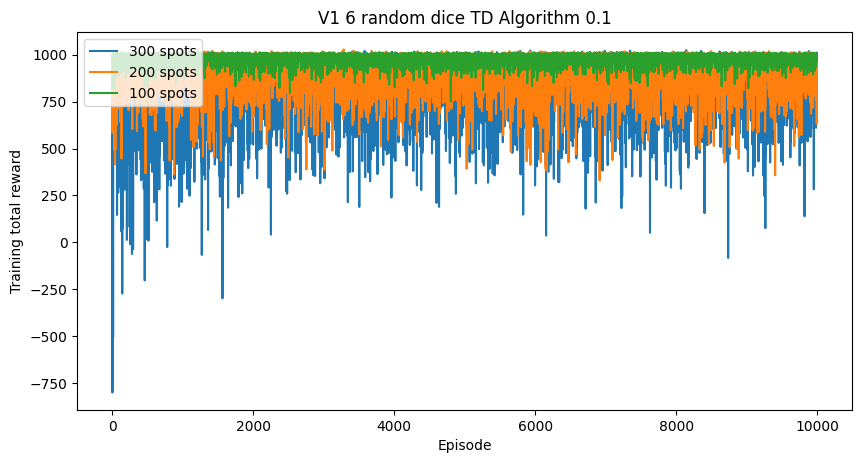

<Figure size 432x288 with 0 Axes>

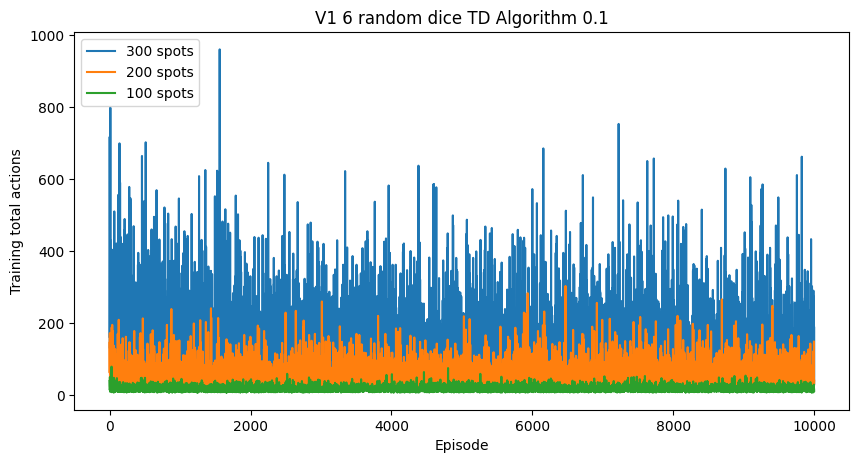

In [ ]:
#@title V1 6 random dice TD Algorithm 0.1
import matplotlib.pyplot as plt
no_dice=6
eligibility_decay=0.1
x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=no_dice), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=no_dice), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=no_dice), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 6 dices are:
[2, 4, 4, 2, 3, 5]
[4, 6, 6, 2, 2, 2]
[6, 1, 5, 2, 4, 4]
[4, 5, 6, 3, 3, 4]
[5, 3, 5, 2, 1, 2]
[3, 3, 3, 2, 5, 3]
Training score over time: 977.2403
Training actions over time: 17.9477
the 6 dices are:
[3, 3, 6, 3, 3, 1]
[5, 2, 4, 5, 6, 6]
[6, 3, 4, 2, 2, 6]
[5, 5, 6, 1, 3, 3]
[1, 6, 1, 3, 2, 6]
[3, 5, 6, 2, 4, 5]
Training score over time: 930.4627
Training actions over time: 54.9808
the 6 dices are:
[5, 4, 1, 1, 5, 1]
[6, 2, 5, 2, 6, 4]
[3, 1, 2, 2, 2, 5]
[6, 5, 3, 3, 2, 5]
[5, 2, 1, 3, 1, 1]
[4, 4, 2, 1, 2, 1]
Training score over time: 914.4905
Training actions over time: 85.59


<Figure size 432x288 with 0 Axes>

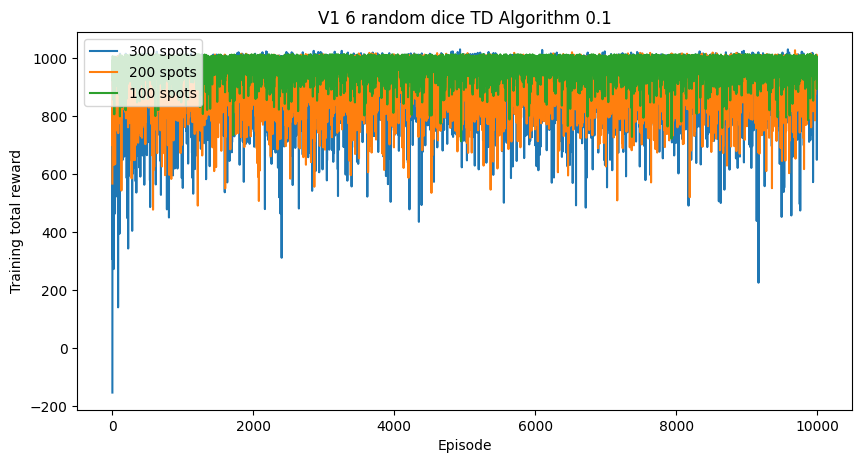

<Figure size 432x288 with 0 Axes>

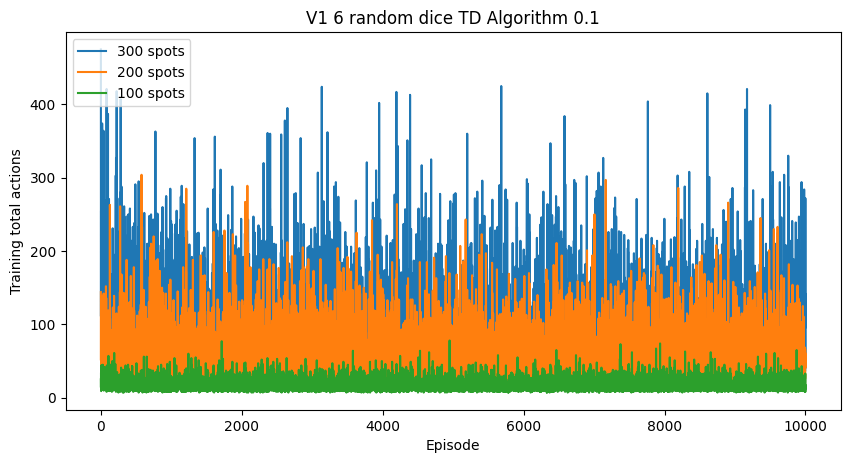

In [ ]:
#@title V1 6 random dice TD Algorithm 0.5
import matplotlib.pyplot as plt
no_dice=6
eligibility_decay=0.1
x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=no_dice), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=no_dice), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=no_dice), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 6 dices are:
[6, 5, 6, 2, 4, 6]
[6, 3, 2, 1, 3, 5]
[1, 1, 4, 6, 4, 6]
[1, 6, 6, 4, 4, 4]
[5, 3, 2, 6, 4, 1]
[2, 4, 3, 6, 4, 1]
Training score over time: 947.6267
Training actions over time: 23.5613
the 6 dices are:
[6, 6, 4, 5, 6, 1]
[5, 6, 4, 6, 3, 1]
[6, 4, 2, 5, 5, 5]
[6, 6, 4, 1, 1, 4]
[4, 1, 6, 1, 1, 4]
[1, 2, 6, 5, 2, 6]
Training score over time: 838.9162
Training actions over time: 86.7063
the 6 dices are:
[3, 3, 3, 1, 5, 6]
[4, 4, 6, 4, 2, 3]
[4, 4, 4, 5, 3, 3]
[3, 3, 3, 3, 6, 5]
[5, 4, 2, 1, 2, 4]
[5, 3, 2, 6, 4, 3]
Training score over time: 778.5963
Training actions over time: 147.6412


<Figure size 432x288 with 0 Axes>

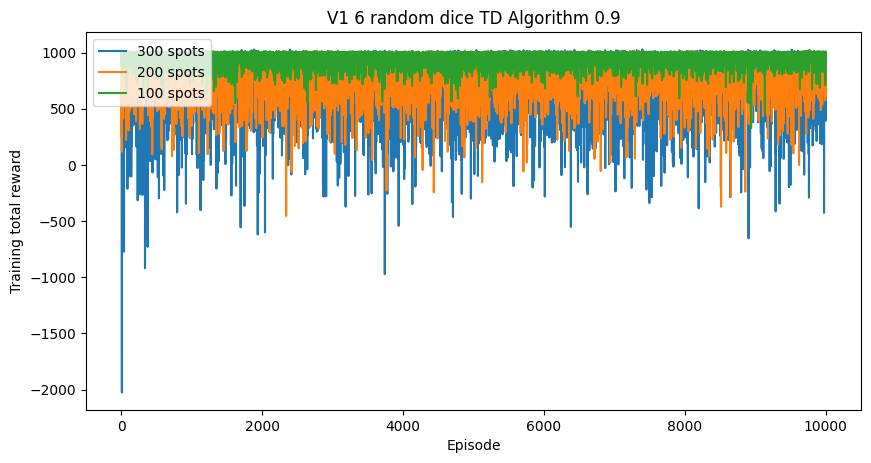

<Figure size 432x288 with 0 Axes>

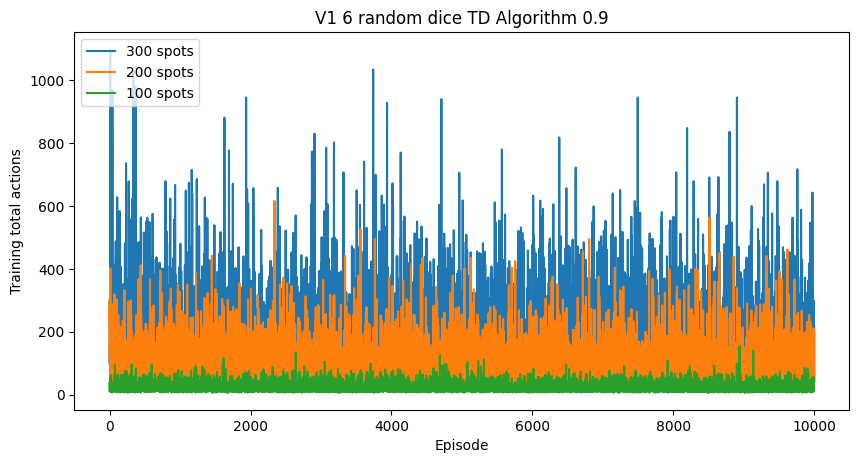

In [ ]:
#@title V1 6 random dice TD Algorithm 0.9
import matplotlib.pyplot as plt
no_dice=6
eligibility_decay=0.9
x, training_rewards_100, action_list_100=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 100, no_dice=no_dice), 
   spot_num = 100, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_200, action_list_200=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 200, no_dice=no_dice), 
   spot_num = 200, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)
x, training_rewards_300, action_list_300=\
TD(train_episodes = 10000, 
   env=SL_v1_rdndice(spot_num = 300, no_dice=no_dice), 
   spot_num = 300, 
   alpha = 0.01, 
   discount_factor = 0.8, 
   epsilon = 0.7, 
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.1,   
   eligibility_decay = eligibility_decay)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title(f'V1 {no_dice} random dice TD Algorithm {eligibility_decay}')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

In [9]:
#@title QL algorithm
import random
def QL(train_episodes = 1000, env=SL_v1_2dice(spot_num = 100), spot_num=100, alpha=0.005, discount_factor=0.8, epsilon=0.7, max_epsilon=1, min_epsilon=0.01, decay=0.01):
  
  #STEP 1 - Initializing the Q-table
  spot_num = spot_num
  train_episodes = train_episodes
  env = env
  state = env.reset()
  score = 0
  done =False
  Q = np.zeros((spot_num + 1, env.action_space.n))
  
  #Setting the hyperparameters             
  alpha = alpha #learning rate                 
  discount_factor = discount_factor           
  epsilon = epsilon                  
  max_epsilon = max_epsilon
  min_epsilon = min_epsilon         
  decay = decay  
          
  
  #Training the agent
  #Creating lists to keep track of reward and epsilon values
  training_rewards = []  
  epsilons = []
  action_list=[]
  for episode in range(train_episodes):
    state = env.reset()
    done = False
    score = 0 
    action_cnt = 0    
    ##Starting the tracker for the rewards
    total_training_rewards = 0
    while not done:
    ##Choosing an action given the states based on a random number
      exp_exp_tradeoff = random.uniform(0, 1)       
    #### STEP 2: SECOND option for choosing the initial action - exploit     
    ##If the random number is larger than epsilon: employing exploitation 
    ##and selecting best action 
      if exp_exp_tradeoff > epsilon:
        action = np.argmax(Q[state,:])      
      else:
        action = env.action_space.sample()

      new_state, reward, dice, done = env.step(action)
      Q[state, action] = Q[state, action] + alpha * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])

      total_training_rewards += reward      
      state = new_state
      action_cnt += 1
    action_list.append(action_cnt)
    #Cutting down on exploration by reducing the epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)

    #     #Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)    
  print("Training score over time: " + str(sum(training_rewards)/train_episodes))
  print("Training actions over time: " + str(sum(action_list)/train_episodes))
  x = range(train_episodes)
  return x, training_rewards, action_list

Training score over time: 989.9554
Training actions over time: 15.2346
Training score over time: 942.2366
Training actions over time: 46.0829
Training score over time: 909.6456
Training actions over time: 75.3409


<Figure size 432x288 with 0 Axes>

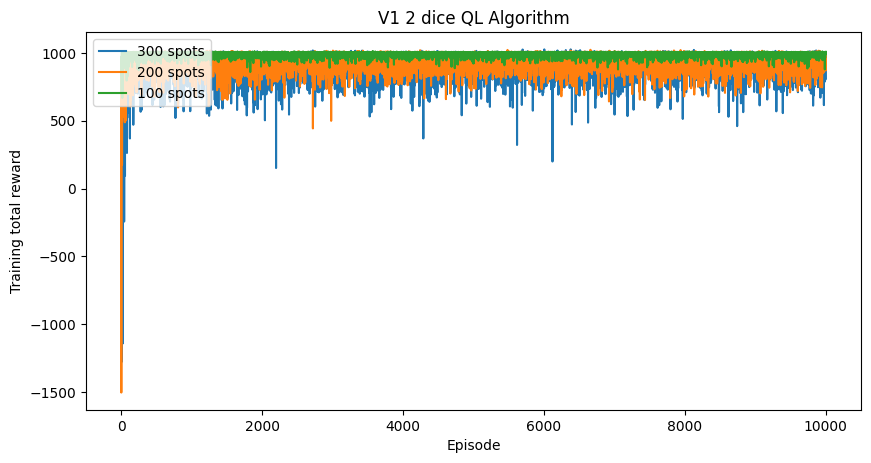

<Figure size 432x288 with 0 Axes>

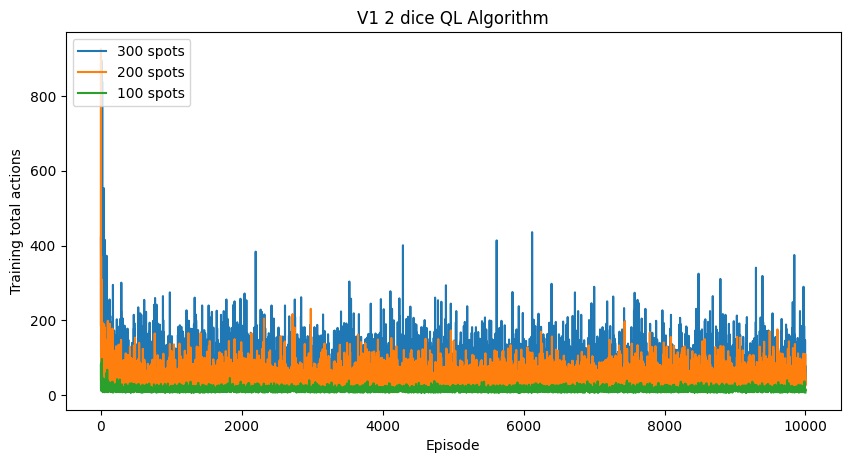

In [ ]:
x, training_rewards_100, action_list_100=\
QL(train_episodes = 10000,
   env=SL_v1_2dice(spot_num = 100),
   spot_num=100,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

_, training_rewards_200, action_list_200=\
QL(train_episodes = 10000,
   env=SL_v1_2dice(spot_num = 200),
   spot_num=200,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

_, training_rewards_300, action_list_300=\
QL(train_episodes = 10000,
   env=SL_v1_2dice(spot_num = 300),
   spot_num=300,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('V1 2 dice QL Algorithm')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()
# V1 2 dice TD Algorithm 0.9 diagram
plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title('V1 2 dice QL Algorithm')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 2 dices are:
[5, 5, 5, 5, 6, 5]
[1, 2, 1, 1, 4, 2]
Training score over time: 996.0055
Training actions over time: 13.462
the 2 dices are:
[1, 6, 6, 6, 6, 4]
[3, 6, 5, 3, 2, 4]
Training score over time: 919.1778
Training actions over time: 51.2667
the 2 dices are:
[5, 6, 3, 5, 4, 4]
[5, 4, 1, 5, 4, 3]
Training score over time: 453.7448
Training actions over time: 224.6687


<Figure size 432x288 with 0 Axes>

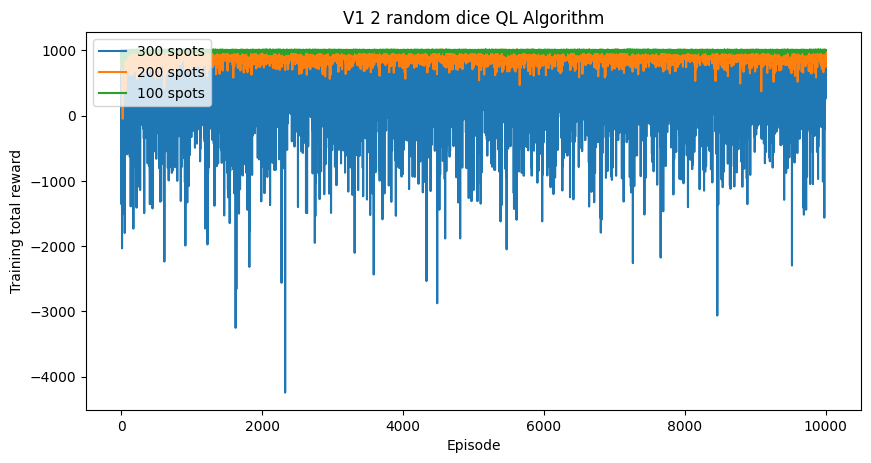

<Figure size 432x288 with 0 Axes>

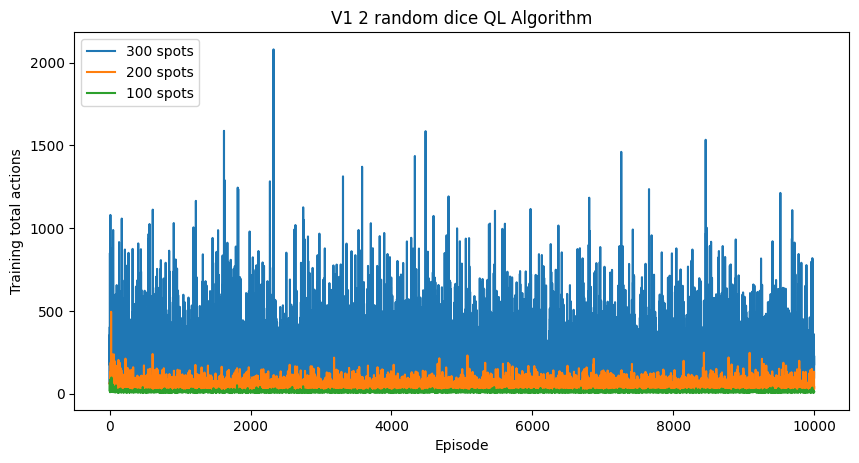

In [ ]:
#@title V1 2 random dice QL Algorithm
import matplotlib.pyplot as plt
no_dice=2
eligibility_decay=0.1
x, training_rewards_100, action_list_100=\
x, training_rewards_100, action_list_100=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 100, no_dice=no_dice), 
   spot_num=100,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

_, training_rewards_200, action_list_200=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 200, no_dice=no_dice),
   spot_num=200,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

_, training_rewards_300, action_list_300=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 300, no_dice=no_dice),
   spot_num=300,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title(f'V1 {no_dice} random dice QL Algorithm')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title(f'V1 {no_dice} random dice QL Algorithm')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 4 dices are:
[6, 2, 6, 5, 2, 5]
[4, 6, 6, 6, 2, 4]
[4, 6, 4, 4, 1, 3]
[6, 6, 3, 5, 5, 2]
Training score over time: 983.0051
Training actions over time: 15.3104
the 4 dices are:
[2, 1, 2, 2, 5, 5]
[6, 3, 5, 4, 2, 1]
[5, 5, 4, 3, 5, 4]
[2, 6, 5, 5, 2, 4]
Training score over time: 888.7435
Training actions over time: 77.9875
the 4 dices are:
[1, 3, 4, 5, 6, 5]
[3, 4, 4, 6, 3, 3]
[5, 5, 6, 1, 1, 4]
[5, 1, 6, 6, 5, 5]
Training score over time: 909.1008
Training actions over time: 79.0032


<Figure size 432x288 with 0 Axes>

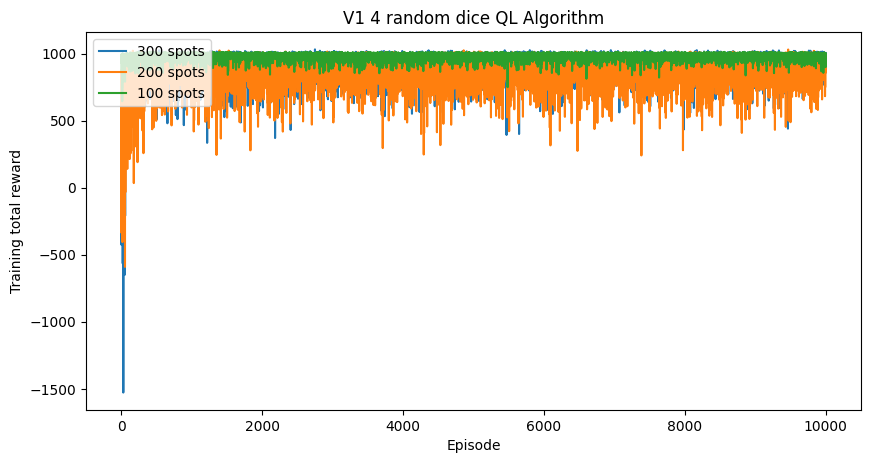

<Figure size 432x288 with 0 Axes>

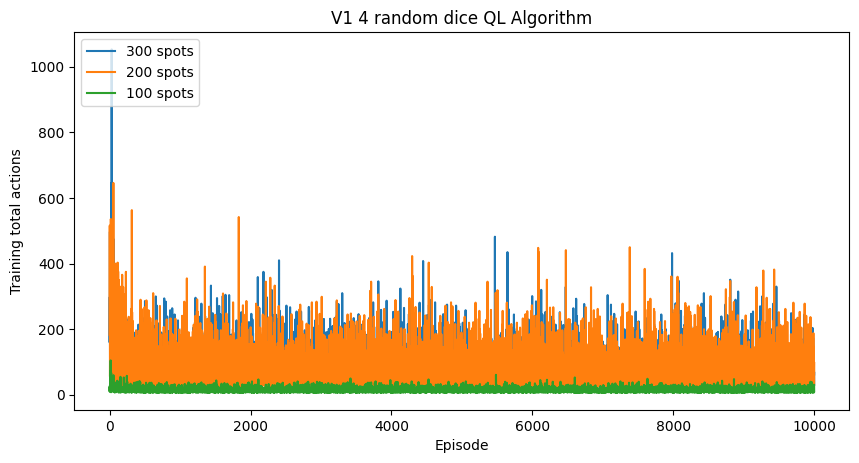

In [ ]:
#@title V1 4 random dice QL Algorithm
import matplotlib.pyplot as plt
no_dice=4
eligibility_decay=0.1
x, training_rewards_100, action_list_100=\
x, training_rewards_100, action_list_100=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 100, no_dice=no_dice), 
   spot_num=100,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

_, training_rewards_200, action_list_200=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 200, no_dice=no_dice),
   spot_num=200,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

_, training_rewards_300, action_list_300=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 300, no_dice=no_dice),
   spot_num=300,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title(f'V1 {no_dice} random dice QL Algorithm')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title(f'V1 {no_dice} random dice QL Algorithm')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

the 6 dices are:
[6, 1, 3, 1, 3, 1]
[5, 4, 1, 5, 5, 3]
[4, 6, 4, 6, 1, 2]
[4, 2, 2, 1, 2, 6]
[4, 4, 5, 5, 2, 4]
[1, 3, 4, 4, 6, 3]
Training score over time: 994.1313
Training actions over time: 14.0917
the 6 dices are:
[2, 2, 2, 5, 6, 1]
[4, 2, 4, 3, 6, 6]
[3, 4, 2, 4, 1, 1]
[3, 1, 1, 2, 5, 2]
[5, 5, 4, 2, 4, 3]
[6, 6, 2, 4, 4, 2]
Training score over time: 935.8692
Training actions over time: 50.3563
the 6 dices are:
[4, 2, 5, 5, 4, 3]
[6, 1, 2, 3, 5, 2]
[4, 4, 1, 6, 2, 2]
[1, 2, 5, 4, 6, 5]
[1, 4, 3, 5, 6, 3]
[1, 1, 1, 1, 2, 1]
Training score over time: 928.2206
Training actions over time: 75.3109


<Figure size 432x288 with 0 Axes>

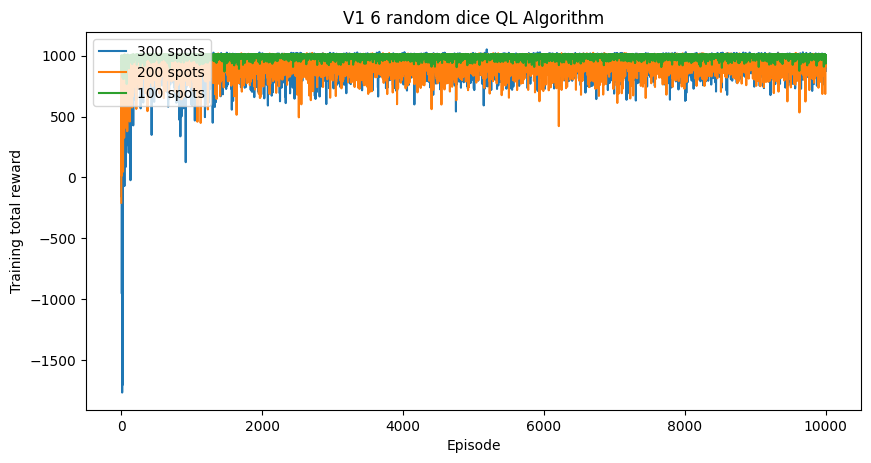

<Figure size 432x288 with 0 Axes>

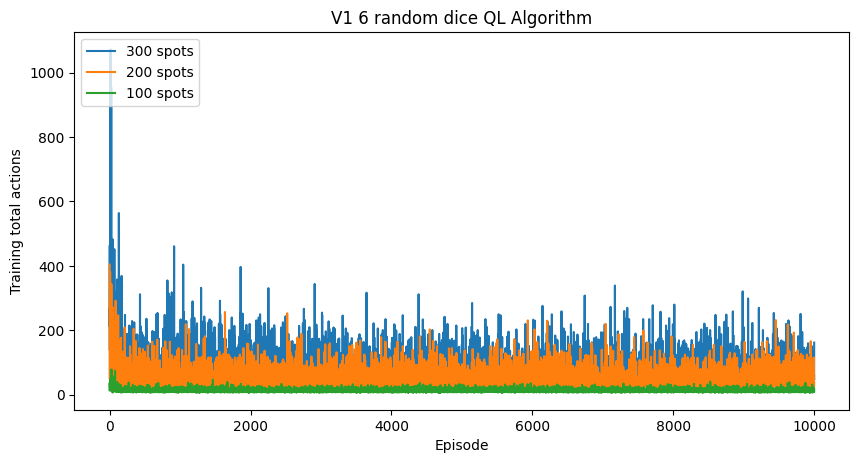

In [11]:
#@title V1 6 random dice QL Algorithm
import matplotlib.pyplot as plt
no_dice=6
eligibility_decay=0.1
x, training_rewards_100, action_list_100=\
x, training_rewards_100, action_list_100=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 100, no_dice=no_dice), 
   spot_num=100,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

_, training_rewards_200, action_list_200=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 200, no_dice=no_dice),
   spot_num=200,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

_, training_rewards_300, action_list_300=\
QL(train_episodes = 10000,
   env=SL_v1_rdndice(spot_num = 300, no_dice=no_dice),
   spot_num=300,
   alpha=0.005, 
   discount_factor=0.8, 
   epsilon=0.7,
   max_epsilon=1, 
   min_epsilon=0.01, 
   decay=0.01)

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, training_rewards_300)
plt.plot(training_rewards_200)
plt.plot(training_rewards_100)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title(f'V1 {no_dice} random dice QL Algorithm')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()

plt.figure()
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x, action_list_300)
plt.plot(action_list_200)
plt.plot(action_list_100)
plt.xlabel('Episode')
plt.ylabel('Training total actions')
plt.title(f'V1 {no_dice} random dice QL Algorithm')
plt.legend(("300 spots", '200 spots', '100 spots'), loc='upper left')
plt.show()